 # <center> Eddy Heat Fluxes </center> #

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import sys
from scipy.interpolate import interp1d
from scipy import interpolate
from numba import autojit
from pylab import *
from matplotlib import gridspec
import netCDF4
sys.path.append('/noc/users/hb1g13/Python/python_functions/')
from useful import *
from Flat_channel import *
from HB_Plot import nf, fmt
sys.path.append('/noc/users/hb1g13/Python/python_functions/MITgcmUtils/')
import utils
%matplotlib inline


In [2]:
# Some parameters
Full = 'N'  # 9 Pannels isn't ideal for presentations N option give 4 plots
Qplot = 'Y'

# <center> Full Topography Runs </center> ##

In [3]:
if Full == 'N':
    tau = ['3', '300', '3000', 'Closed']
elif Full == 'Extremes':
    tau = ['3','Closed']
else:
    tau = ['3', '10', '30', '100', '300',
           '1000', '3000', '10000', 'Closed']
Figletter = ['a) ','b) ','c) ','d) ','e)','f)','g)','h)','j)']
# Path root
x = '/noc/msm/scratch/students/hb1g13/Mobilis/Full'
# Now Make file structure
check = 0
runs = []
for i in range(len(tau)):
    flist = x+'/'+str(tau[i])+'/PSI.nc'
    if not os.path.exists(flist):
        print ' WARNING: '+flist+' does not exist! (skipping this tau...)'
        check += 0
    else:
        check += 1
        runs.append(i)
Runs=np.array(runs)
# Set Parameters
alpha = 2.000000E-04
g = -9.81
rho_0 = 1000
C_p = 3985

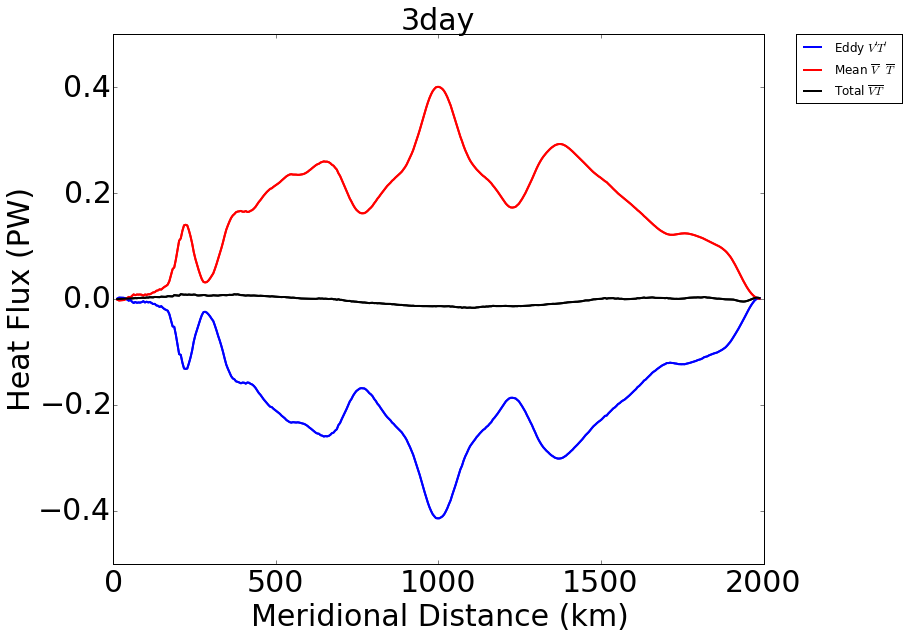

In [4]:
fig = plt.figure(figsize=(20.5, 16.5))
# Create Panels
Psi_levs = np.arange(-2., 2., .21)
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = (arange(-5,5,0.2))*10**-8
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    i = 0
    fname = x+'/'+str(tau[Runs[i]])+'/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.get_theta()
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL',mask=c.HFacS))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL',mask=c.HFacC))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH',mask=c.HFacS))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH',mask=c.HFacC))

    VpTp = ma.mean(c.depth_integrate(-( (VT) - V*T )*c.HFacC),axis=1)*c.Lx
    WpTp = ma.mean( (WT) - W*T ,axis=2)
    VtavTtav = ma.mean(c.depth_integrate(-V*T*c.HFacC), axis=1)*c.Lx
    VTtav = ma.mean(c.depth_integrate(-VT*c.HFacC), axis=1)*c.Lx
    
    MeanHF=1030*3985*VtavTtav/10**15
    EddyHF=1030*3985*VpTp/10**15
    TotalHF=1030*3985*VTtav/10**15

    #title(r'$\nabla \cdot \overline{\mathbf{u} b}$', fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    # VTzone[VTzone<-0.029]=-0.029
    E,=ax.plot(c.yc/1000,EddyHF,'b',linewidth=2)
    M,=ax.plot(c.yc/1000,MeanHF,'r',linewidth=2)
    T,=ax.plot(c.yc/1000,TotalHF,'k',linewidth=2)
    ax.set_title(str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(tau[Runs[i]]), fontsize=30)
    ax.set_ylabel("Heat Flux (PW)", fontsize=30)
    ax.set_xlabel("Meridional Distance (km)", fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
lgd=legend([E,M,T],["Eddy $V'T'$","Mean $\overline{V}\,\,\overline{T}$",
                    "Total $\overline{VT}$"],bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)

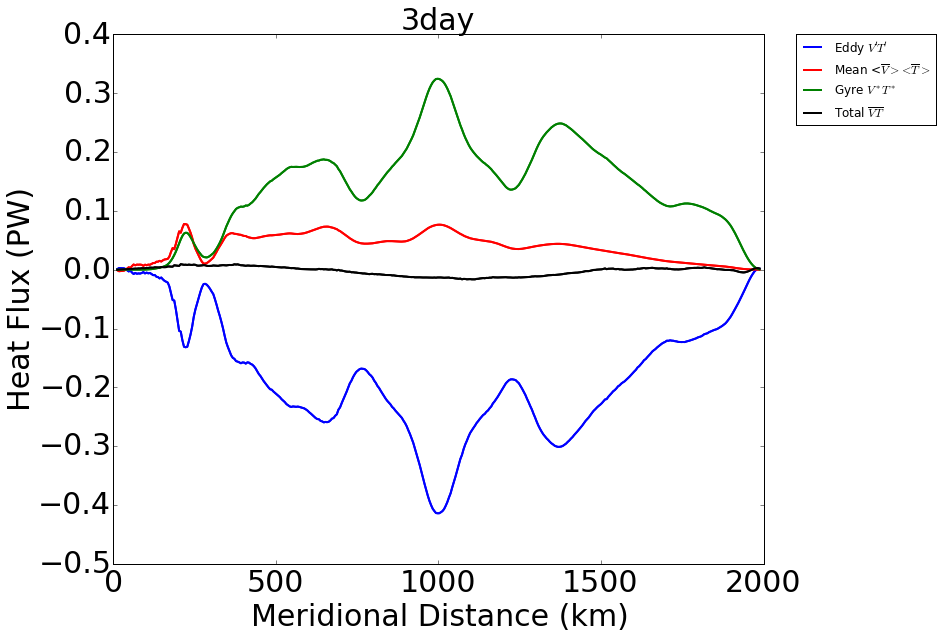

In [5]:
fig = plt.figure(figsize=(20.5, 16.5))
# Create Panels
Psi_levs = np.arange(-2., 2., .21)
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = (arange(-5,5,0.2))*10**-8
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    i = 0
    fname = x+'/'+str(tau[Runs[i]])+'/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.get_theta()
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL',mask=c.HFacS))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL',mask=c.HFacC))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH',mask=c.HFacS))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH',mask=c.HFacC))
    VpTp = ma.mean(c.depth_integrate(-( (VT) - V*T )*c.HFacC),axis=1)*c.Lx
    WpTp = ma.mean( (WT) - W*T ,axis=2)
    VtavTtav = ma.mean(c.depth_integrate(-V*T*c.HFacC), axis=1)*c.Lx
    VTtav = ma.mean(c.depth_integrate(-VT*c.HFacC), axis=1)*c.Lx
    MeanHF=1030*3985*VtavTtav/10**15
    EddyHF=1030*3985*VpTp/10**15
    TotalHF=1030*3985*VTtav/10**15
    
    # Standing Eddies
    vzone = tile(ma.mean(V,axis=2).T,(c.Nx,1,1)).T
    tzone = tile(ma.mean(T,axis=2).T,(c.Nx,1,1)).T
    
    tstar = T-tzone
    vstar = V-vzone
    
    VstTst = 1030*3985*ma.mean(c.depth_integrate(-vstar*tstar*c.HFacC), axis=1)*c.Lx/10**15
    VzoTst = 1030*3985*ma.mean(c.depth_integrate(-vzone*tstar*c.HFacC), axis=1)*c.Lx/10**15
    TzoVst = 1030*3985*ma.mean(c.depth_integrate(-vstar*tzone*c.HFacC), axis=1)*c.Lx/10**15
    tvzone = 1030*3985*ma.mean(c.depth_integrate(-vzone*tzone*c.HFacC), axis=1)*c.Lx/10**15
    
    GyreHF = VstTst+VzoTst+TzoVst
    MeanHF = tvzone
    #title(r'$\nabla \cdot \overline{\mathbf{u} b}$', fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    # VTzone[VTzone<-0.029]=-0.029
    E,=ax.plot(c.yc/1000,EddyHF,'b',linewidth=2)
    M,=ax.plot(c.yc/1000,MeanHF,'r',linewidth=2)
    G,=ax.plot(c.yc/1000,GyreHF,'g',linewidth=2)
    T,=ax.plot(c.yc/1000,TotalHF,'k',linewidth=2)
    ax.set_title(str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(tau[Runs[i]]), fontsize=30)
    ax.set_ylabel("Heat Flux (PW)", fontsize=30)
    ax.set_xlabel("Meridional Distance (km)", fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
lgd=legend([E,M,G,T],["Eddy $V'T'$","Mean <$\overline{V}><\overline{T}>$","Gyre $V^*T^*$","Total $\overline{VT}$"],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:22: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:22: RuntimeWarning: invalid value encountered in divide


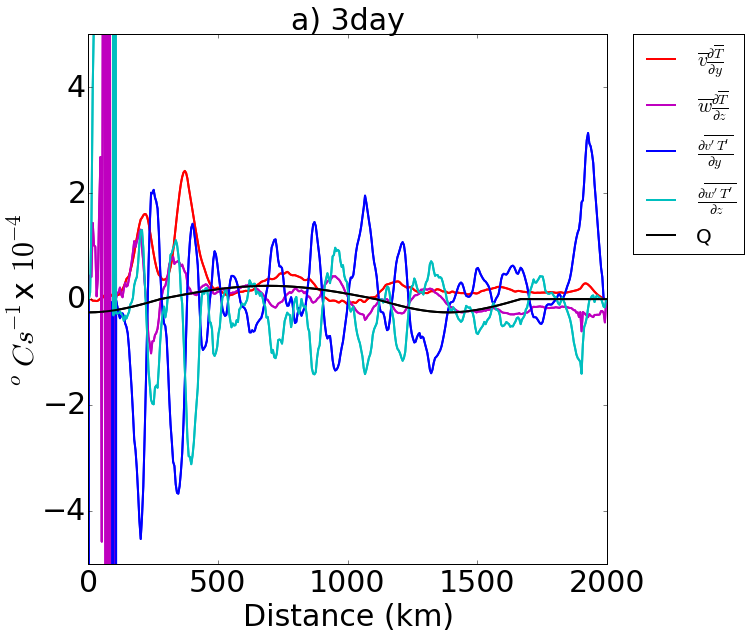

In [40]:
fig = plt.figure(figsize=(16.5, 16.5))
for i in range(len(Runs)):
    i = 0
    fname = x+'/'+str(tau[Runs[i]])+'/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = ma.mean(c.mnc('Tav.nc','THETA',mask=c.HFacC), axis=2)
    V = ma.mean(c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL',mask=c.HFacS)*c.HFacS), axis=2)
    W = ma.mean(c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL',mask=c.HFacC))*c.HFacC, axis=2)
    VT= ma.mean(c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH',mask=c.HFacS)*c.HFacS), axis=2)
    WT= ma.mean(c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH',mask=c.HFacC))*c.HFacC, axis=2)

    VpTp =  (((VT) - V*T ))
    WpTp =  (((WT) - W*T ))
    # mean zonal flow                                       
    Tbar = T
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz
    mld = c.mnc('MLD.nc','MXLDEPTH')
    MLD = -mld[0,:,:].mean(axis=1)
    Depth_matrix = tile(c.dzf,(c.Ny,1)).T
    Depth_matrix[np.cumsum(-Depth_matrix,axis=0)<MLD]=0
    VTy = ma.sum((V)*Ty*Depth_matrix,axis=0)
    WTz = ma.sum((W)*Tz*Depth_matrix,axis=0)
    VpTpy = ma.sum(c.ddy_cgrid_centered(VpTp)*Depth_matrix, axis=0)
    WpTpz = ma.sum(c.ddz_cgrid_centered(WpTp)*Depth_matrix, axis=0)

    
    Ly = 2000e3
    Lx = 1000e3
    nx = np.round(Lx/5000)
    ny = np.round(Ly/5000)
    Q_0 = 10
    Q = np.zeros_like(c.yc)
    pi = math.pi
    Q=np.zeros(np.shape(Q))
    Q[0:int(5*ny/36)] = Q_0*(np.cos(c.yc[0:int(5*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Q[int(5*ny/36):int(20*ny/36)] = -Q_0*(np.sin((c.yc[int(5*ny/36):int(20*ny/36)]-c.yc[int(5*ny/36)])*(pi/(c.yc[int(15*ny/36)]))))
    Q[int(20*ny/36):int(30*ny/36)] = Q_0*(np.sin(c.yc[0:int(10*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Psipred = -(Q)/(1000*3985)
    ax = fig.add_subplot(2, 2, i+1)
    p = plt.plot(c.yc/1000,VTy*10**5,'r',linewidth=2)
    p = plt.plot(c.yc/1000,WTz*10**5,'m',linewidth=2)
    p = plt.plot(c.yc/1000,VpTpy*10**5,'b',linewidth=2)
    p = plt.plot(c.yc/1000,WpTpz*10**5,'c',linewidth=2)
    p = plt.plot(c.yc/1000,Psipred*10**5,'k',linewidth=2)
    plt.ylim(-5,5)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-4}$', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
lgd=plt.legend([r'$\overline{v}\frac{\partial \overline{T}}{\partial y}$',r'$\overline{w}\frac{\partial \overline{T}}{\partial z}$',r'$\frac{\partial \overline{v^\prime T^\prime}}{\partial y}$',r'$\frac{\partial \overline{w^\prime T^\prime}}{\partial z}$','Q'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.tight_layout()

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:22: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:22: RuntimeWarning: invalid value encountered in divide


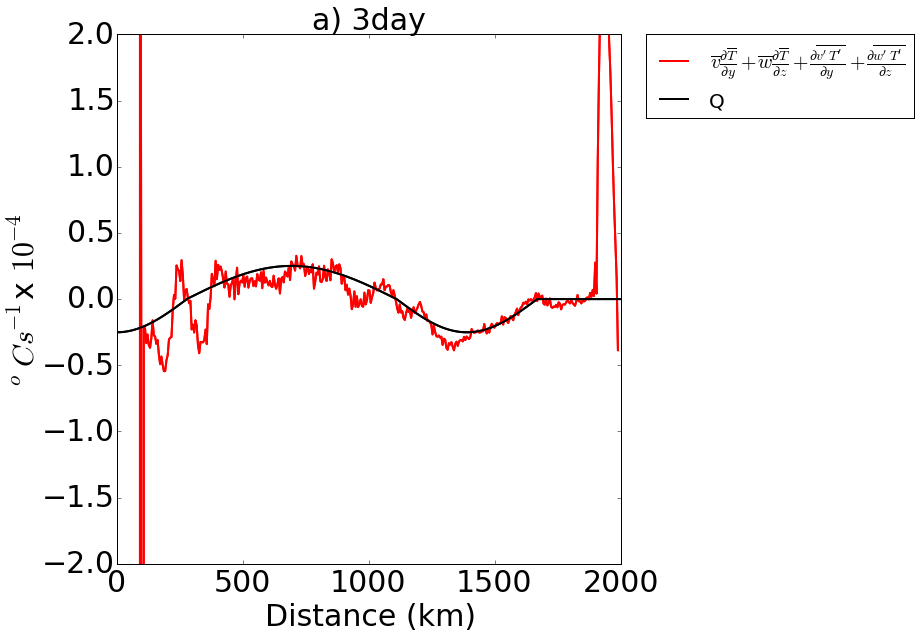

In [6]:
fig = plt.figure(figsize=(16.5, 16.5))
for i in range(len(Runs)):
    i = 0
    fname = x+'/'+str(tau[Runs[i]])+'/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = ma.mean(c.mnc('Tav.nc','THETA',mask=c.HFacC), axis=2)
    V = ma.mean(c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL',mask=c.HFacS)*c.HFacS), axis=2)
    W = ma.mean(c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL',mask=c.HFacC))*c.HFacC, axis=2)
    VT= ma.mean(c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH',mask=c.HFacS)*c.HFacS), axis=2)
    WT= ma.mean(c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH',mask=c.HFacC))*c.HFacC, axis=2)

    VpTp =  (((VT) - V*T ))
    WpTp =  (((WT) - W*T ))
    # mean zonal flow                                       
    Tbar = T
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz
    mld = c.mnc('MLD.nc','MXLDEPTH')
    MLD = -mld[0,:,:].mean(axis=1)
    Depth_matrix = tile(c.dzf,(c.Ny,1)).T
    Depth_matrix[np.cumsum(-Depth_matrix,axis=0)<MLD]=0
    VTy = ma.sum((V)*Ty*Depth_matrix,axis=0)
    WTz = ma.sum((W)*Tz*Depth_matrix,axis=0)
    VpTpy = ma.sum(c.ddy_cgrid_centered(VpTp)*Depth_matrix, axis=0)
    WpTpz = ma.sum(c.ddz_cgrid_centered(WpTp)*Depth_matrix, axis=0)
    D = VTy+WTz+WpTpz+VpTpy
    Ly = 2000e3
    Lx = 1000e3
    nx = np.round(Lx/5000)
    ny = np.round(Ly/5000)
    Q_0 = 10
    Q = np.zeros_like(c.yc)
    pi = math.pi
    Q=np.zeros(np.shape(Q))
    Q[0:int(5*ny/36)] = Q_0*(np.cos(c.yc[0:int(5*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Q[int(5*ny/36):int(20*ny/36)] = -Q_0*(np.sin((c.yc[int(5*ny/36):int(20*ny/36)]-c.yc[int(5*ny/36)])*(pi/(c.yc[int(15*ny/36)]))))
    Q[int(20*ny/36):int(30*ny/36)] = Q_0*(np.sin(c.yc[0:int(10*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Psipred = -(Q)/(1000*3985)
    ax = fig.add_subplot(2, 2, i+1)
    #p = plt.plot(c.yc/1000,VTy*10**5,'r',linewidth=2)
    p = plt.plot(c.yc/1000,D*10**5,'r',linewidth=2)
    p = plt.plot(c.yc/1000,Psipred*10**5,'k',linewidth=2)
    plt.ylim(-2,2)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-4}$', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
lgd=plt.legend([r'$\overline{v}\frac{\partial \overline{T}}{\partial y} + \overline{w}\frac{\partial \overline{T}}{\partial z} + \frac{\partial \overline{v^\prime T^\prime}}{\partial y} + \frac{\partial \overline{w^\prime T^\prime}}{\partial z}$','Q'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.tight_layout()

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:22: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:22: RuntimeWarning: invalid value encountered in divide


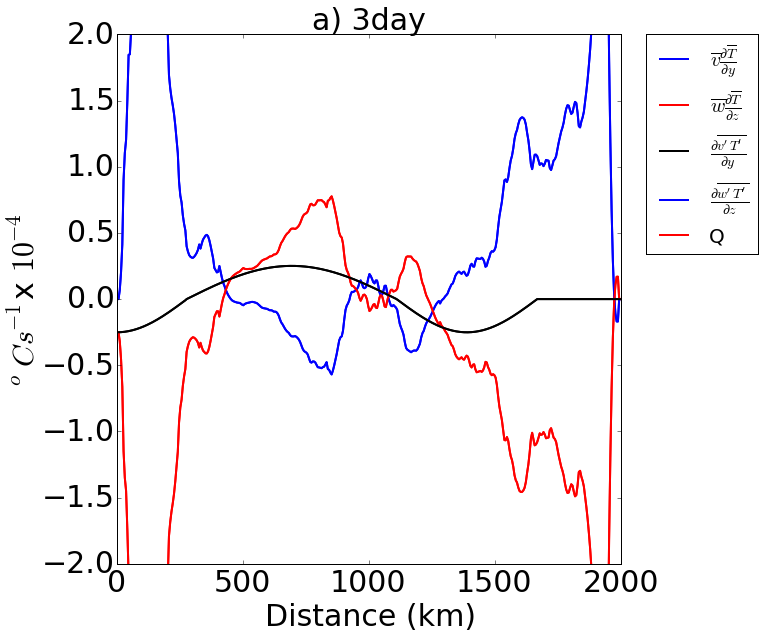

In [45]:
fig = plt.figure(figsize=(16.5, 16.5))
for i in range(len(Runs)):
    i = 0
    fname = x+'/'+str(tau[Runs[i]])+'/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = ma.mean(c.mnc('Tav.nc','THETA',mask=c.HFacC), axis=2)
    V = ma.mean(c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL',mask=c.HFacS)*c.HFacS), axis=2)
    W = ma.mean(c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL',mask=c.HFacC))*c.HFacC, axis=2)
    VT= ma.mean(c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH',mask=c.HFacS)*c.HFacS), axis=2)
    WT= ma.mean(c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH',mask=c.HFacC))*c.HFacC, axis=2)

    VpTp =  (((VT) - V*T ))
    WpTp =  (((WT) - W*T ))
    # mean zonal flow                                       
    Tbar = T
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz
    mld = c.mnc('MLD.nc','MXLDEPTH')
    MLD = -mld[0,:,:].mean(axis=1)
    Depth_matrix = tile(c.dzf,(c.Ny,1)).T
    Depth_matrix[np.cumsum(-Depth_matrix,axis=0)<MLD]=0
    VTy = ma.sum((V)*Ty*Depth_matrix,axis=0)
    WTz = ma.sum((W)*Tz*Depth_matrix,axis=0)
    VpTpy = ma.sum(c.ddy_cgrid_centered(VpTp)*Depth_matrix, axis=0)
    WpTpz = ma.sum(c.ddz_cgrid_centered(WpTp)*Depth_matrix, axis=0)
    Depth_matrix[Depth_matrix>0]=1
    Psi = c.get_psi_iso_z()/c.Lx
    dPsi = -ma.sum(Depth_matrix*Psi*Ty[0,:], axis=0)
    D = Psipred - dPsi
    Ly = 2000e3
    Lx = 1000e3
    nx = np.round(Lx/5000)
    ny = np.round(Ly/5000)
    Q_0 = 10
    Q = np.zeros_like(c.yc)
    pi = math.pi
    Q=np.zeros(np.shape(Q))
    Q[0:int(5*ny/36)] = Q_0*(np.cos(c.yc[0:int(5*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Q[int(5*ny/36):int(20*ny/36)] = -Q_0*(np.sin((c.yc[int(5*ny/36):int(20*ny/36)]-c.yc[int(5*ny/36)])*(pi/(c.yc[int(15*ny/36)]))))
    Q[int(20*ny/36):int(30*ny/36)] = Q_0*(np.sin(c.yc[0:int(10*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Psipred = -(Q)/(1000*3985)
    ax = fig.add_subplot(2, 2, i+1)
    p = plt.plot(c.yc/1000,dPsi*10**5,'b',linewidth=2)
    p = plt.plot(c.yc/1000,D*10**5,'r',linewidth=2)
    p = plt.plot(c.yc/1000,Psipred*10**5,'k',linewidth=2)
    plt.ylim(-2,2)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-4}$', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
lgd=plt.legend([r'$\overline{v}\frac{\partial \overline{T}}{\partial y}$',r'$\overline{w}\frac{\partial \overline{T}}{\partial z}$',r'$\frac{\partial \overline{v^\prime T^\prime}}{\partial y}$',r'$\frac{\partial \overline{w^\prime T^\prime}}{\partial z}$','Q'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.tight_layout()